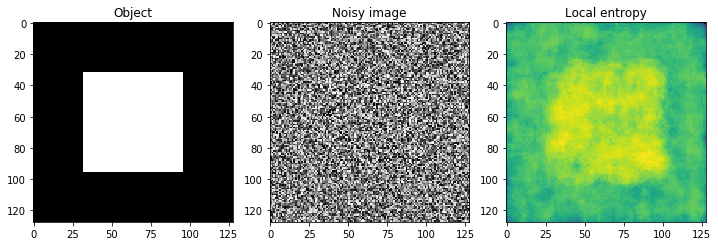

In [3]:
import matplotlib.pyplot as plt
import numpy as np

from skimage import data
from skimage.util import img_as_ubyte
from skimage.filters.rank import entropy
from skimage.morphology import disk

noise_mask = np.full((128, 128), 28, dtype=np.uint8)
noise_mask[32:-32, 32:-32] = 30

noise = (noise_mask * np.random.random(noise_mask.shape) - 0.5 *
         noise_mask).astype(np.uint8)
img = noise + 128

entr_img = entropy(img, disk(10))

fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))

img0 = ax0.imshow(noise_mask, cmap='gray')
ax0.set_title("Object")
ax1.imshow(img, cmap='gray')
ax1.set_title("Noisy image")
ax2.imshow(entr_img, cmap='viridis')
ax2.set_title("Local entropy")

fig.tight_layout()

[[0.61465255 0.63426039 0.63818196 ... 0.         0.         0.        ]
 [0.60093059 0.61661686 0.62053843 ... 0.         0.         0.        ]
 [0.50515333 0.51691804 0.52083961 ... 0.         0.         0.        ]
 ...
 [0.50603804 0.50211647 0.50211647 ... 0.         0.         0.        ]
 [0.50742196 0.50742196 0.51134353 ... 0.         0.         0.        ]
 [0.52813098 0.53205255 0.53205255 ... 0.         0.         0.        ]]


C:\Users\liubomyr.ivanitskyi\Anaconda3\lib\site-packages\skimage\filters\rank\generic.py:119: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  out_dtype)


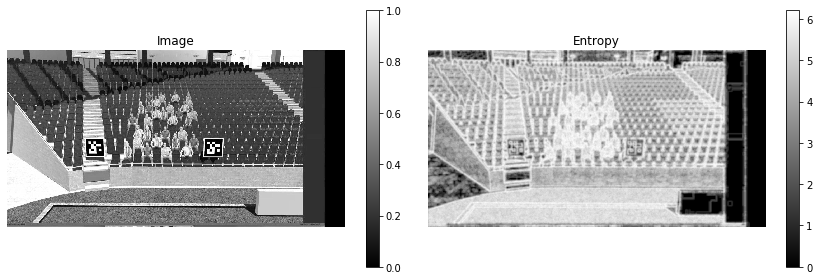

In [4]:
import os
import skimage
from skimage.color import rgb2gray
filename = os.path.join(skimage.data_dir, 'moon.png')
from skimage import io
image = rgb2gray(io.imread("samples/unity_seats.jpg"))
image2 = rgb2gray(io.imread("samples/real_seats.jpg"))

print(image)

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(12, 4),
                               sharex=True, sharey=True)

img0 = ax0.imshow(image, cmap=plt.cm.gray)
ax0.set_title("Image")
ax0.axis("off")
fig.colorbar(img0, ax=ax0)

img1 = ax1.imshow(entropy(image, disk(5)), cmap='gray')
ax1.set_title("Entropy")
ax1.axis("off")
fig.colorbar(img1, ax=ax1)

fig.tight_layout()

plt.show()

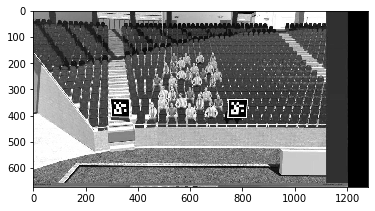

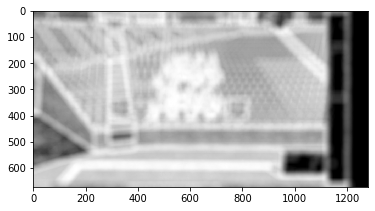

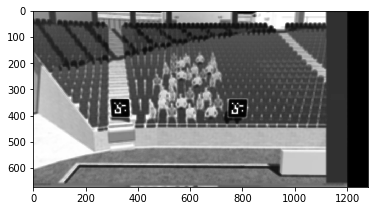

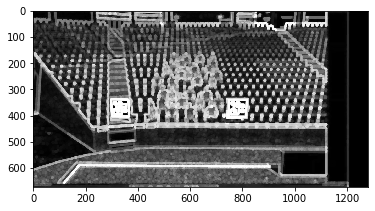

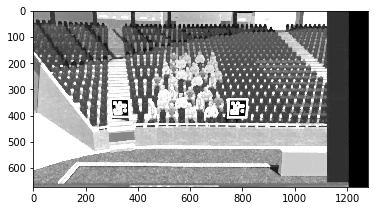

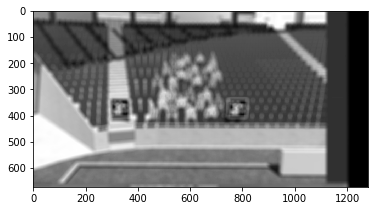

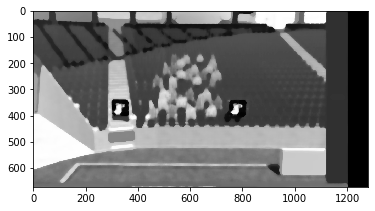

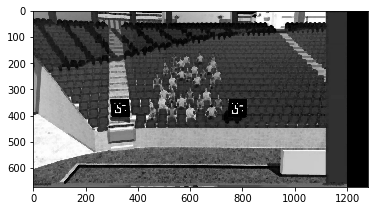

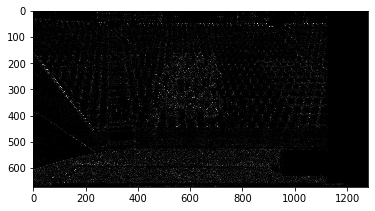

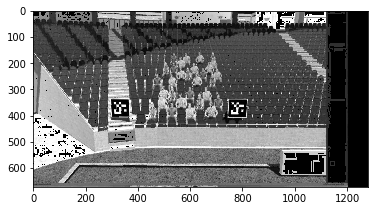

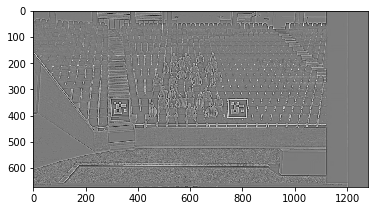

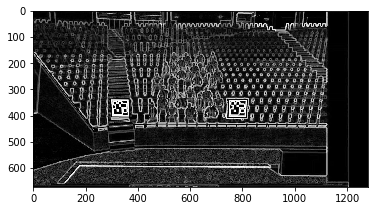

In [5]:
from skimage.filters.rank import entropy
plt.imshow(image, cmap='gray')
plt.show()


from skimage.filters.rank import entropy
plt.imshow(entropy(image, disk(20)), cmap='gray')
plt.show()

from skimage.filters.rank import geometric_mean
plt.imshow(geometric_mean(image, disk(5)), cmap='gray')
plt.show()

from skimage.filters.rank import gradient
plt.imshow(gradient(image, disk(5)), cmap='gray')
plt.show()

from skimage.filters.rank import maximum
plt.imshow(maximum(image, disk(3)), cmap='gray')
plt.show()

from skimage.filters.rank import mean
plt.imshow(mean(image, disk(10)), cmap='gray')
plt.show()

from skimage.filters.rank import median
plt.imshow(median(image, disk(10)), cmap='gray')
plt.show()

from skimage.filters.rank import minimum
plt.imshow(minimum(image, disk(3)), cmap='gray')
plt.show()

from skimage.filters.rank import noise_filter
plt.imshow(noise_filter(image, disk(1)), cmap='gray')
plt.show()

from skimage.filters.rank import otsu
plt.imshow(otsu(image, disk(1)), cmap='gray')
plt.show()

from skimage.filters.rank import subtract_mean
plt.imshow(subtract_mean(image, disk(5)), cmap='gray')
plt.show()

from skimage.filters.rank import tophat
plt.imshow(tophat(image, disk(5)), cmap='gray')
plt.show()


In [6]:

def normalize(image):
    return image/np.max(image)

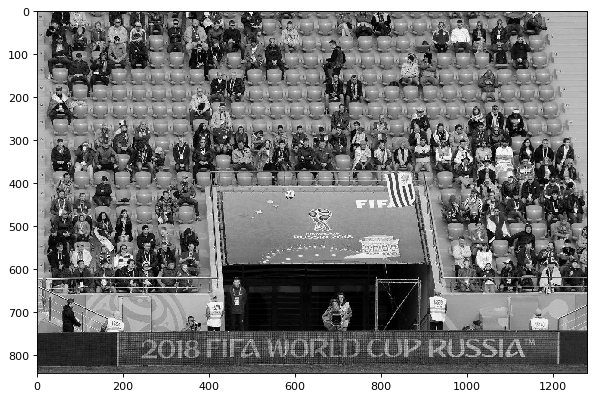

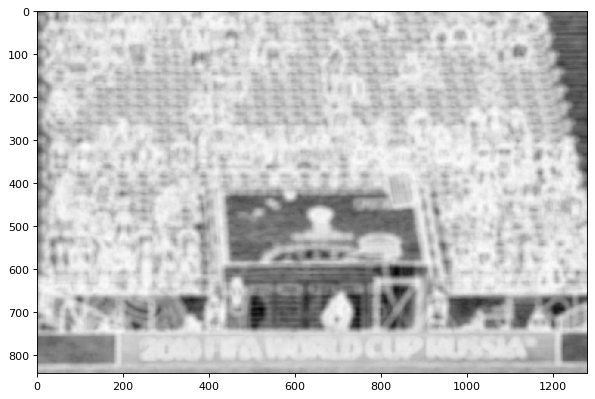

In [7]:

from matplotlib.pyplot import figure

figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')

en = normalize(entropy(image2, disk(10)))

plt.imshow(image2, cmap='gray')
plt.show()

figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(en, cmap='gray')
plt.show()


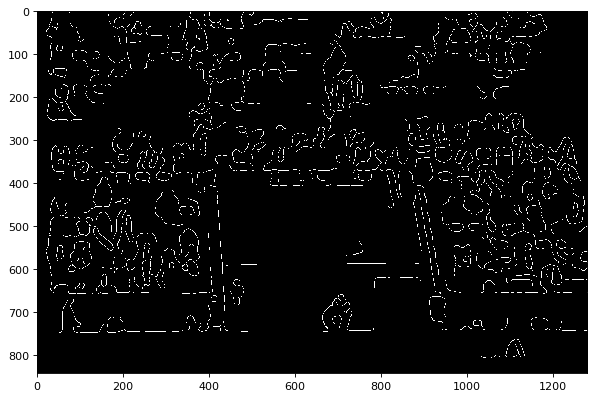

In [8]:
from skimage import feature

figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(feature.canny(image2, sigma=5), cmap='gray')
plt.show()

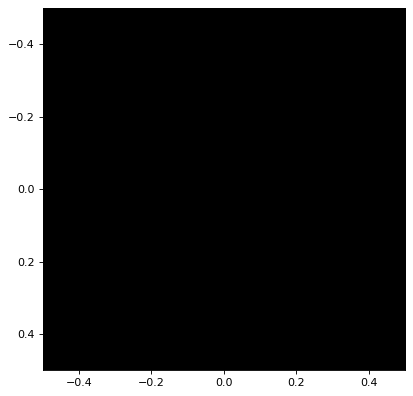

In [9]:
from skimage.feature import match_template
figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(match_template(image2, image2), cmap='gray')
plt.show()

In [10]:
# from scipy import signal
# corr = signal.correlate2d(image2, image2, boundary='symm', mode='same')

In [11]:
!pip install scikit-image

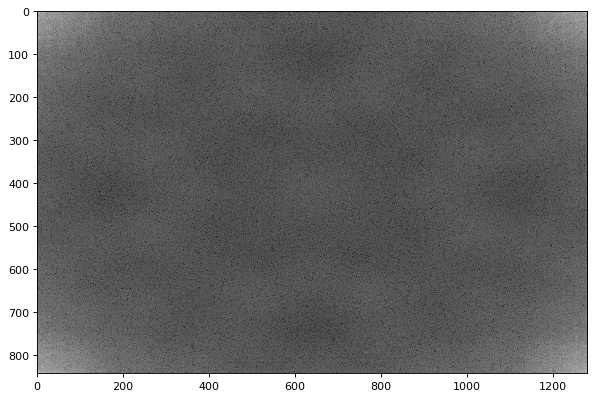

In [12]:
from scipy.fftpack import fft2, fftshift
figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(np.log(np.abs(fft2(normalize(entropy(image2, disk(5)))))), cmap='gray')
plt.show()

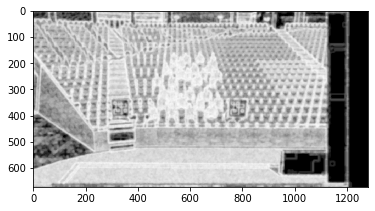

In [29]:
image_entropy = normalize(entropy(image, disk(5)))
                          
from skimage import color
                          
three_channel_image = color.gray2rgb(img_as_ubyte(image_entropy))

plt.imshow(cv2.medianBlur(three_channel_image, 5))
plt.show()

(673, 1280)
VOVA


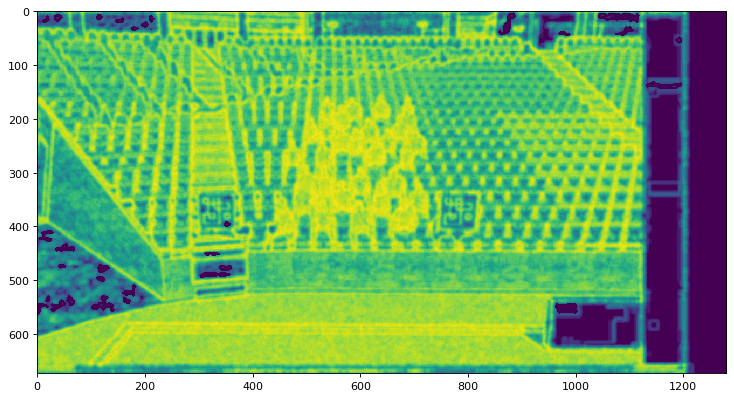

In [37]:
import cv2 

from skimage import img_as_ubyte

print(entropy(image, disk(5)).shape)

def get_squares(gray, l_thresh , h_thresh, structuring_element_side):
    
#     gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blur = cv2.medianBlur(gray, 5)
    sharpen_kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
    sharpen = cv2.filter2D(blur, -1, sharpen_kernel)

    thresh = cv2.threshold(sharpen,25,50, cv2.THRESH_BINARY_INV)[1]
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
    close = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)

    cnts = cv2.findContours(close, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]

    min_area = 25
    max_area = 1000
    image_number = 0
    squares = [] 
    for c in cnts:
        area = cv2.contourArea(c)
        if area > min_area and area < max_area:
            c = c.reshape(-1, 2)
            squares.append(c)
#         x,y,w,h = cv2.boundingRect(c)
#         ROI = image[y:y+h, x:x+h]
#         cv2.imwrite('ROI_{}.png'.format(image_number), ROI)
#         cv2.rectangle(image, (x, y), (x + w, y + h), (36,255,12), 2)
            image_number += 1
    
    return squares, close, thresh

print("VOVA")
# print(sharpen.shape)
figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
squares, close, thresh = get_squares(img_as_ubyte(normalize(entropy(image, disk(5)))), 10, 20, 3)
plt.imshow(cv2.drawContours(entropy(image, disk(5)), squares, -1, (0, 255, 0), 3))